# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

from common import *

# 1. Load dataset

In [2]:
train_data = pd.read_csv(join(PATH.input, "train_data.csv"))
sample_submission = pd.read_csv(join(PATH.input, "sample_submission.csv"))
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859200 entries, 0 to 3859199
Data columns (total 13 columns):
 #   Column   Dtype  
---  ------   -----  
 0   TurbID   int64  
 1   Day      int64  
 2   Tmstamp  object 
 3   Wspd     float64
 4   Wdir     float64
 5   Etmp     float64
 6   Itmp     float64
 7   Ndir     float64
 8   Pab1     float64
 9   Pab2     float64
 10  Pab3     float64
 11  Prtv     float64
 12  Patv     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 382.8+ MB


# 2. Preprocessing

## 1) Generate `Time`

In [3]:
%%time
train_data = generate_full_timestamp(train_data)

CPU times: user 5.36 s, sys: 93.3 ms, total: 5.45 s
Wall time: 3.45 s


In [4]:
train_data[(train_data['TurbID'] == 1) & (train_data['Day'] == 1)]

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,Time
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66,2
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76,3
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53,4
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1,1,23:10,9.95,0.49,28.71,42.53,-9.44,1.02,1.02,1.02,-0.29,1330.24,140
140,1,1,23:20,12.20,0.70,28.59,42.56,-8.17,1.08,1.08,1.08,-0.23,1550.74,141
141,1,1,23:30,12.66,1.09,28.54,42.23,-8.17,1.08,1.08,1.08,-0.21,1549.66,142
142,1,1,23:40,12.58,1.70,28.48,42.09,-8.17,1.08,1.08,1.08,-0.20,1549.64,143


In [5]:
train_data[(train_data['TurbID'] == 1) & (train_data['Day'] == 2)]

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,Time
144,1,2,00:00,10.64,-1.59,28.10,42.17,-9.66,1.01,1.01,1.01,-0.27,1468.21,145
145,1,2,00:10,7.00,0.84,27.87,42.05,-2.77,1.00,1.00,1.00,-0.16,718.12,146
146,1,2,00:20,5.87,-2.61,27.38,41.73,-9.17,0.99,0.99,0.99,-0.27,442.15,147
147,1,2,00:30,4.00,3.26,27.13,41.76,-8.20,0.99,0.99,0.99,-0.21,196.04,148
148,1,2,00:40,4.03,2.88,26.99,41.66,2.82,0.99,0.99,0.99,-0.23,234.35,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,2,23:10,10.82,-1.22,27.77,40.18,7.52,1.01,1.01,1.01,-0.19,1516.64,284
284,1,2,23:20,11.37,1.52,27.55,40.22,7.49,1.04,1.04,1.04,-0.22,1543.12,285
285,1,2,23:30,11.98,1.55,27.37,40.29,7.44,1.07,1.07,1.07,-0.19,1549.74,286
286,1,2,23:40,11.80,0.19,27.17,40.25,7.42,1.06,1.06,1.06,-0.19,1549.64,287


## 2) Imputing

In [6]:
train_data = impute_data(train_data)

Number of Nan values: 0


In [7]:
train_data.drop(columns=['Day', 'Tmstamp'], inplace=True)

In [8]:
train_data.head()

,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,Time
0,1,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,1
1,1,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,2
2,1,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,3
3,1,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,4
4,1,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,5


## 3) Split data

In [9]:
IN_SEQ_LEN  = 5*144
OUT_SEQ_LEN = 2*144
STRIDE      = 1*144
SHUFFLE     = False
TEST_SIZE   = 0.2

In [21]:
train_x, train_y, val_x, val_y, test_x = make_train_val_test_data(train_data, IN_SEQ_LEN, OUT_SEQ_LEN, STRIDE, SHUFFLE, TEST_SIZE)
train_y = train_y[:, :, -2]
val_y   = val_y[:, :, -2]
print("y:", train_y.shape, val_y.shape)

100%|██████████| 134/134 [00:13<00:00,  9.92it/s]


Train data(X, y)     : (19832, 720, 11) (19832, 288, 11)
Validation data(X, y): (4958, 720, 11) (4958, 288, 11)
Test data(X)         : (134, 720, 11)


# 3. Modeling

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

tf.keras.utils.set_random_seed(RANDOM_STATE)
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

In [24]:
model = Sequential([
    GRU(256, input_shape=train_x[0].shape),
    Dense(516, activation='relu'),
    Dense(288, activation='relu')
])
optimizer = tf.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 4. Training

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=1000, batch_size=128, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]);

Epoch 1/1000


2022-07-12 12:43:04.746903: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2022-07-12 12:43:08.861496: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


155/155 [==============================] - 16s 42ms/step - loss: 226939.4844 - mae: 349.2867 - val_loss: 167472.0781 - val_mae: 315.6648
Epoch 2/1000
155/155 [==============================] - 6s 41ms/step - loss: 205682.6875 - mae: 348.0874 - val_loss: 163260.4531 - val_mae: 302.3774
Epoch 3/1000
155/155 [==============================] - 6s 40ms/step - loss: 198261.6875 - mae: 340.2433 - val_loss: 160039.0938 - val_mae: 304.5740
Epoch 4/1000
155/155 [==============================] - 6s 40ms/step - loss: 192190.1094 - mae: 337.1115 - val_loss: 158101.1250 - val_mae: 305.9936
Epoch 5/1000
155/155 [==============================] - 6s 41ms/step - loss: 187700.0000 - mae: 333.3261 - val_loss: 156973.2812 - val_mae: 308.1661
Epoch 6/1000
155/155 [==============================] - 6s 41ms/step - loss: 185493.0000 - mae: 331.2047 - val_loss: 158076.3125 - val_mae: 313.5095
Epoch 7/1000
155/155 [==============================] - 6s 40ms/step - loss: 183815.7344 - mae: 329.3748 - val_loss: 1

# 5. Check validation set

In [44]:
plt.style.use('ggplot')

In [34]:
y_true = val_y
y_pred = model.predict(val_x)

155/155 [==============================] - 2s 12ms/step


In [66]:
i = 0  # Turbine 1
y_t = y_true[37*i:37*(i+1)].reshape(-1)
y_p = y_pred[37*i:37*(i+1)].reshape(-1)

y_t = y_t[:1000]
y_p = y_p[:1000]

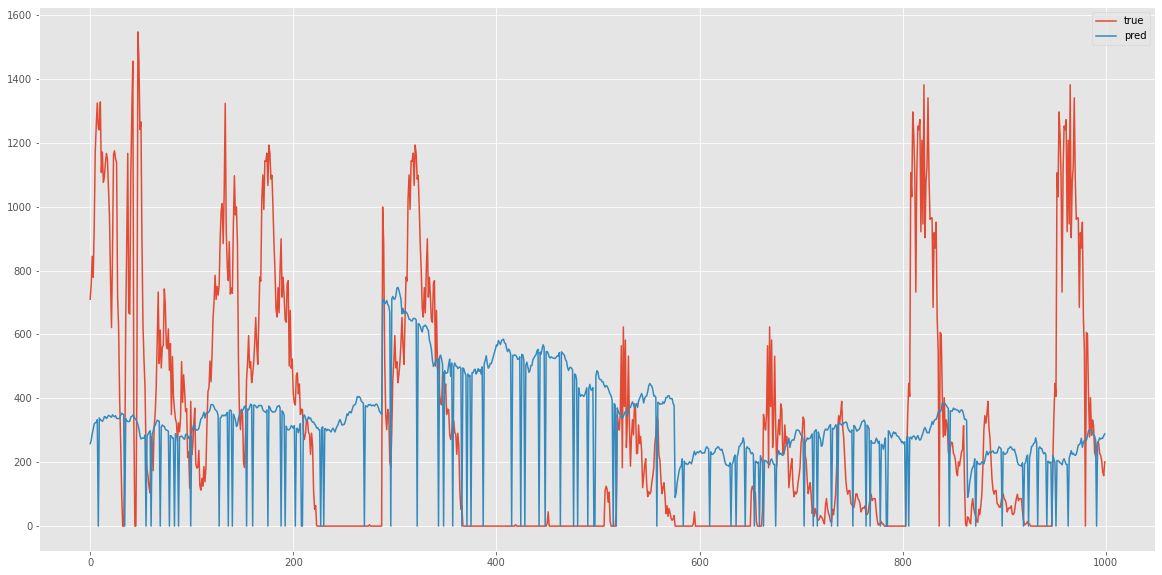

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y_t, label='true')
ax.plot(y_p, label='pred')
plt.legend();

# 6. Generate submission

In [68]:
sample_submission['Patv'] = model.predict(test_x).reshape(-1)
sample_submission.to_csv(join(PATH.output, "proposed7.csv"), index=False)

5/5 [==============================] - 0s 11ms/step
